# Load dataset

In [3]:
import pandas as pd

In [4]:
raw_df = pd.read_csv("data/X.csv", header=None)

### Fix column headers
Use wavelengths from `Wavelength.csv` as column headers of data.

In [5]:
wavelengths = pd.read_csv("data/Wavelength.csv", header=None)
wavelength_df = raw_df.rename(columns=wavelengths.T.loc[0])

### Read output values

In [6]:
y = pd.read_csv("data/y.csv", header=None)

# Turn pandas rows into single vector
y = y[0]

# Split training and test set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wavelength_df, y, test_size=0.3, random_state=24)

# Preprocessing

### Data Visualisation

In [8]:
import matplotlib.pyplot as plt

### Visualise dataset

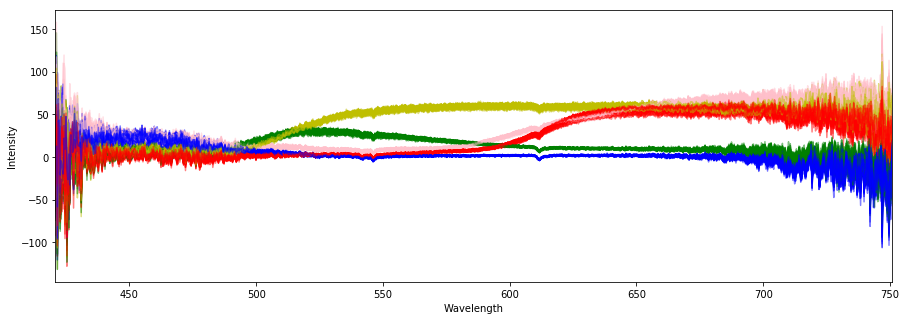

In [26]:
plt.figure(figsize=(15,5))
for i,row in X_train.iterrows():
    output = y_train[i]
    if output == 0:
        color = 'b'
    elif output == 1:
        color = 'g'
    elif output == 2:
        color = 'pink'
    elif output == 3:
        color = 'r'
    elif output == 4:
        color = 'y'
        
    ax = row.plot(color=color, alpha=0.5)
    ax.set_xlabel("Wavelength")
    ax.set_ylabel("Intensity")
plt.show()

### Plot correlation of each input feature

In [11]:
# Add output column to check correlation
correlation_data = X_train.assign(output=y_train)

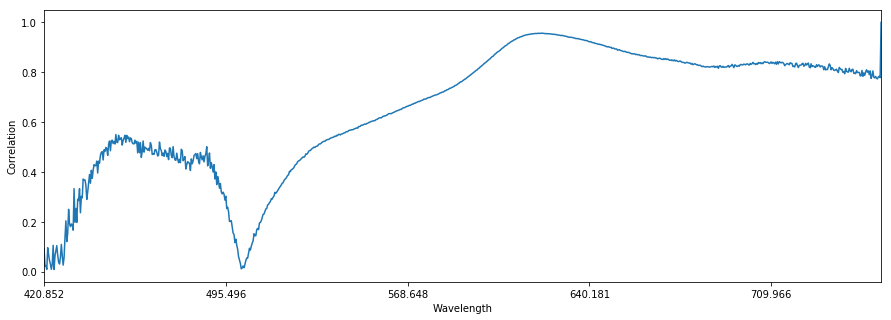

In [12]:
plt.figure(figsize=(15,5))
ax = correlation_data.corr()["output"].map(abs).plot()
ax.set_xlabel("Wavelength")
ax.set_ylabel("Correlation")
plt.show()

# Training

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
# Simple logisitic regression on training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get accuracy of predictions
predictions = lr.predict(X_train)
accuracy_score(y_train, predictions)

1.0

### Cross validation
Try using k-fold cross validation to reduce overfitting

In [16]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(LogisticRegression(), X_train, y_train, cv=10)
accuracy_score(y_train, predictions)

1.0

In [17]:
# Try higher k-fold 
predictions = cross_val_predict(LogisticRegression(), X_train, y_train, cv=50)
accuracy_score(y_train, predictions)

1.0

### Less training samples
Use less training samples to confirm model is not overfitting to training data


In [18]:
# Further split training set
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_train, y_train, test_size = 0.9, random_state=64)

print("Small training set size: " + str(len(X_train_small)))
print("Small testing set size: " + str(len(X_test_small)))

Small training set size: 31
Small testing set size: 284


In [22]:
lr_small = LogisticRegression()
lr_small.fit(X_train_small, y_train_small)

# Accuracy on small training set
small_predictions = lr_small.predict(X_train_small)
accuracy_score(y_train_small, small_predictions)

1.0

In [21]:
# Accuracy on testing set after training with small set
small_test_predictions = lr_small.predict(X_test_small)
accuracy_score(y_test_small, small_test_predictions)

1.0

### Less input features

In [23]:
from sklearn.feature_selection import RFECV

lr_rfecv = LogisticRegression()
rfecv = RFECV(lr_rfecv, step=1, scoring="accuracy", cv=5)
rfecv.fit(X_train, y_train)

RFECV(cv=5,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

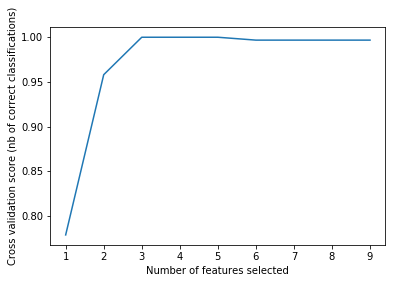

In [24]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, 10), rfecv.grid_scores_[:9])
plt.show()

In [38]:
def inputfeature_hist(feature, X, y):
    oneX = X[[X.columns[feature]]] #[[feature]]
    oneX["output"] = y
    
    # Plot figure
    #plt.figure(figsize=(15,5))
    ax = oneX[oneX["output"] == 0][oneX.columns[0]].plot.hist(color='b', alpha=0.5, bins=25)
    ax = oneX[oneX["output"] == 1][oneX.columns[0]].plot.hist(color='g', alpha=0.5, bins=25)
    ax = oneX[oneX["output"] == 2][oneX.columns[0]].plot.hist(color='pink', alpha=0.5, bins=25)
    ax = oneX[oneX["output"] == 3][oneX.columns[0]].plot.hist(color='r', alpha=0.5, bins=25)
    ax = oneX[oneX["output"] == 4][oneX.columns[0]].plot.hist(color='y', alpha=0.5, bins=25)
    ax.set_xlabel("Intensity")
    ax.set_title("Input feature wavelength " + str(X.columns[feature]))
    plt.show()

In [50]:
from sklearn.feature_selection import RFE

lr_rfe = LogisticRegression()
rfe = RFE(lr_rfe, 2, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=2, step=1, verbose=0)

In [53]:
best_features = map(list(rfe.ranking_).index, [i for i in range(1,6)])

In [55]:
best_features

[421, 250, 251, 91, 88]

In [61]:
best_features = [i for i,x in enumerate(list(rfe.ranking_)) if x == 1]

In [62]:
best_features

[421, 429]

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


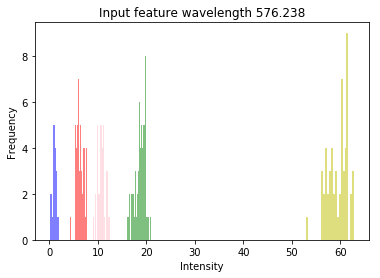

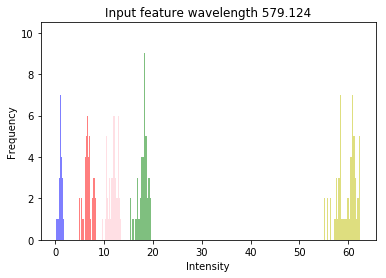

In [60]:
for feature in best_features:
    inputfeature_hist(feature, X_train, y_train)

In [63]:
oneX = X_train[[X_train.columns[421], X_train.columns[429]]]
lr_oneinput = LogisticRegression()
lr_oneinput.fit(oneX, y_train)

# Accuracy on small training set
predictions = lr_oneinput.predict(oneX)
accuracy_score(y_train, predictions)

0.83492063492063495